# Assignment 2 - Group 1

# 03 - Data Cleaning

# Weather

In [298]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [299]:
# Creating a DataFrame from a csv file
weather = pd.read_csv("weather.csv", encoding = "latin-1") 

In [300]:
# Taking a peek at the data
display(weather)

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,NaN,NaN,SW,44.0,11:36,...,NaN,NW,13,991.3,13.2,59.0,NaN,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,NaN,NaN,SSW,43.0,11:33,...,NaN,W,9,1006.7,15.1,54.0,NaN,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,NaN,NaN,SSW,31.0,8:07,...,NaN,SSW,9,1019.2,13.8,67.0,NaN,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,NaN,NaN,S,24.0,14:50,...,NaN,WSW,6,1028.1,16.9,56.0,NaN,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,NaN,NaN,N,31.0,11:58,...,NaN,N,9,1026.3,18.8,65.0,NaN,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,NaN,NaN,SSW,17.0,12:47,...,NaN,NNE,7,1026.8,17.5,58.0,NaN,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,NaN,NaN,SSW,13.0,10:48,...,NaN,NE,6,1030.5,18.6,64.0,NaN,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,NaN,NaN,SSW,22.0,16:09,...,NaN,SW,6,1031.9,18.8,64.0,NaN,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,NaN,NaN,SSW,26.0,15:45,...,NaN,SSE,7,1034.4,17.8,71.0,NaN,SSW,13.0,1032.4


In [301]:
# Checking the shape of the DataFrame
weather.shape

(175, 22)

In [302]:
# Removing the extra whitespace in column headings
weather.columns = weather.columns.str.strip()

In [303]:
# Checking for duplicate rows
weather.duplicated().sum()

0

In [304]:
# Checking for missing values by columns
weather.isnull().sum()

Location                               0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     175
Sunshine (hours)                     175
Direction of maximum wind gust         1
Speed of maximum wind gust (km/h)      1
Time of maximum wind gust              1
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)             175
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)             175
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64

In [305]:
# Dropping columns that are completely empty - 'Evaporation (mm)', 'Sunshine (hours)', 
# '9am cloud amount (oktas)' and '3pm cloud amount (oktas)' 
weather.drop(columns=['Evaporation (mm)', 'Sunshine (hours)', '9am cloud amount (oktas)', '3pm cloud amount (oktas)'], inplace=True)

In [306]:
# Checking for missing values by rows
weather.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
170    0
171    0
172    0
173    0
174    9
Length: 175, dtype: int64

In [307]:
# Row 174 contains 9 missing values, so it is relatively safe to drop it
weather.drop(index=174, inplace=True)

In [308]:
# Checking for any more missing values
weather.isnull().sum() # No missing data

Location                             0
Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Direction of maximum wind gust       0
Speed of maximum wind gust (km/h)    0
Time of maximum wind gust            0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind direction                   0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64

In [309]:
# All values in 'Location' column seem identical, checking this assumption
weather['Location'].unique()

array(['Melbourne (Olympic Park), Victoria'], dtype=object)

In [310]:
# Dropping the 'Location' column because it's a constant
weather.drop(columns=['Location'], inplace=True)

In [311]:
# Checking data types for each column
weather.dtypes

Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: object

In [312]:
# '9am wind speed (km/h)' values are object dtype as opposed to expected numeric;
# Checking unique values of the column
weather['9am wind speed (km/h)'].unique()

array(['13', '9', '6', '4', '15', '17', '11', '7', '24', '19', '22', '20',
       '2', 'Calm'], dtype=object)

In [313]:
# Beaufort Wind Scale: 'Calm' equals to approx 0 km/h, replacing the value with numeric
weather['9am wind speed (km/h)'] = weather['9am wind speed (km/h)'].replace(['Calm'], '0')

In [314]:
# Converting this column and '9am relative humidity (%)' column to float for consistency
weather = weather.astype({'9am wind speed (km/h)':'float', '9am relative humidity (%)':'float'})
weather.dtypes

Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am wind direction                    object
9am wind speed (km/h)                float64
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: object

In [315]:
# Seting the DataFrame index using Date column
weather = weather.set_index('Date')
weather

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,
1/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64.0,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5
2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65.0,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4
3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70.0,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3
4/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84.0,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6
5/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78.0,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/04/2023,14.4,17.5,1.2,SW,28.0,11:32,14.8,66.0,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1
20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72.0,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5
21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78.0,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2


In [316]:
# Change date to datatime format
weather.index = pd.to_datetime(weather.index, format='%d/%m/%Y')
weather.index = weather.index.strftime('%d/%m/%Y')
weather.head()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,
01/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64.0,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5
02/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65.0,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4
03/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70.0,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3
04/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84.0,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6
05/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78.0,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2


In [317]:
# Checking summary statistics
weather.describe()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
count,174.000000,174.000000,174.000000,174.000000,174.00000,174.00000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,14.072414,23.121839,1.786207,34.563218,17.30000,68.66092,9.298851,1014.363218,21.546552,54.298851,13.045977,1012.819540
std,3.228188,5.419904,4.318081,9.083048,3.55235,12.42294,4.632419,7.008131,5.255205,15.155163,4.246476,6.864583
min,6.900000,13.100000,0.000000,13.000000,10.10000,32.00000,0.000000,991.300000,10.800000,16.000000,2.000000,990.300000
25%,11.700000,19.300000,0.000000,28.000000,14.90000,63.00000,7.000000,1011.100000,18.125000,44.000000,11.000000,1008.900000
50%,14.150000,21.700000,0.000000,33.000000,16.90000,68.00000,9.000000,1014.850000,20.400000,55.500000,13.000000,1012.950000
75%,16.075000,26.275000,1.400000,41.000000,18.70000,76.00000,13.000000,1018.675000,24.275000,64.750000,15.000000,1016.900000
max,25.000000,40.500000,38.400000,59.000000,29.90000,100.00000,24.000000,1034.400000,39.600000,97.000000,28.000000,1032.400000


# Price_and_Demand

In [318]:
price_and_demand = pd.read_csv("price_and_demand.csv", header = None)

In [319]:
# Taking a look at the first 10 rows
price_and_demand.head(10)

,0,1,2,3,4
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE
5,VIC1,1/11/2022 3:00,3919.59,1.04,TRADE
6,VIC1,1/11/2022 3:30,3806.64,0.12,TRADE
7,VIC1,1/11/2022 4:00,3794.22,15.95,TRADE
8,VIC1,1/11/2022 4:30,3772.77,0.02,TRADE
9,VIC1,1/11/2022 5:00,3923.90,0.00,TRADE


In [320]:
# Creating headers based on original dataset (AEMO aggregated historical data (http://surl.li/jonpt)
headers = ["Location", "Date & Time", "Total Demand", "Price", "Type"]
price_and_demand.columns = headers

In [321]:
price_and_demand.head()

,Location,Date & Time,Total Demand,Price,Type
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE


In [322]:
# Checking shape 
price_and_demand.shape

(8352, 5)

In [323]:
# Checking for dupplicated rows
price_and_demand.duplicated().sum()

0

In [324]:
# Checking data types
price_and_demand.dtypes

Location         object
Date & Time      object
Total Demand    float64
Price           float64
Type             object
dtype: object

In [325]:
# Check missing values per column
price_and_demand.isna().sum()

Location        0
Date & Time     0
Total Demand    0
Price           0
Type            0
dtype: int64

In [326]:
# All values in 'Region' and 'Period_Type' columns seem identical, checking this assumption
price_and_demand['Location'].unique()

array(['VIC1'], dtype=object)

In [327]:
price_and_demand['Type'].unique()

array(['TRADE'], dtype=object)

In [328]:
# Dropping these columns because they are constants
to_drop = ["Location", "Type"]
price_and_demand.drop(to_drop, inplace=True, axis=1)

In [329]:
price_and_demand.head()

,Date & Time,Total Demand,Price
0,1/11/2022 0:30,4178.18,8.94
1,1/11/2022 1:00,4086.02,0.14
2,1/11/2022 1:30,4033.37,0.02
3,1/11/2022 2:00,3985.64,0.00
4,1/11/2022 2:30,3885.64,0.02


In [330]:
# Splitting Date & Time into different columns
price_and_demand[['Date','Time']] = price_and_demand['Date & Time'].str.split(" ", n=1, expand=True)

In [331]:
# Drop original Data & Time column
to_drop = ["Date & Time"]
price_and_demand.drop(to_drop, inplace=True, axis=1)
price_and_demand.head()

,Total Demand,Price,Date,Time
0,4178.18,8.94,1/11/2022,0:30
1,4086.02,0.14,1/11/2022,1:00
2,4033.37,0.02,1/11/2022,1:30
3,3985.64,0.00,1/11/2022,2:00
4,3885.64,0.02,1/11/2022,2:30


In [332]:
# Setting Date as the index
price_and_demand.set_index("Date", inplace=True)

In [333]:
price_and_demand

,Total Demand,Price,Time
Date,,,
1/11/2022,4178.18,8.94,0:30
1/11/2022,4086.02,0.14,1:00
1/11/2022,4033.37,0.02,1:30
1/11/2022,3985.64,0.00,2:00
1/11/2022,3885.64,0.02,2:30
...,...,...,...
23/04/2023,4717.55,84.09,22:00
23/04/2023,4520.39,81.25,22:30
23/04/2023,4472.49,93.97,23:00


In [334]:
# Removing last row (24-04-23) for consistency with weather dataset
price_and_demand.drop("24/04/2023", inplace=True)

In [335]:
# Counting index values to determine if consistent
index_counts = price_and_demand.index.value_counts()
print(index_counts)

3/03/2023     48
21/11/2022    48
23/03/2023    48
7/12/2022     48
3/02/2023     48
              ..
21/12/2022    48
8/02/2023     48
22/02/2023    48
8/04/2023     48
1/11/2022     47
Name: Date, Length: 174, dtype: int64


In [336]:
# Inserting 1/11/2022 0:00 based on original AEMO aggregated historical data (http://surl.li/jonpt)
newrow = {"Total Demand":4455.59, "Price":44.58, "Time":"0:00"}
newrowdf = pd.DataFrame(newrow, index=["1/11/2022"])
price_and_demand_new = pd.concat([newrowdf, price_and_demand])
price_and_demand_new

,Total Demand,Price,Time
1/11/2022,4455.59,44.58,0:00
1/11/2022,4178.18,8.94,0:30
1/11/2022,4086.02,0.14,1:00
1/11/2022,4033.37,0.02,1:30
1/11/2022,3985.64,0.00,2:00
...,...,...,...
23/04/2023,4792.34,87.43,21:30
23/04/2023,4717.55,84.09,22:00
23/04/2023,4520.39,81.25,22:30
23/04/2023,4472.49,93.97,23:00


In [337]:
# Confirming successful addition
index_counts = price_and_demand_new.index.value_counts()
print(index_counts)

3/03/2023     48
26/12/2022    48
1/11/2022     48
23/03/2023    48
7/12/2022     48
              ..
7/11/2022     48
21/12/2022    48
8/02/2023     48
22/02/2023    48
8/04/2023     48
Length: 174, dtype: int64


In [338]:
# Convert to datetime format to preserve ordering
price_and_demand_new.index = pd.to_datetime(price_and_demand_new.index, dayfirst=True)
price_and_demand_new.index = price_and_demand_new.index.strftime('%d/%m/%Y')
price_and_demand_new.head()

,Total Demand,Price,Time
01/11/2022,4455.59,44.58,0:00
01/11/2022,4178.18,8.94,0:30
01/11/2022,4086.02,0.14,1:00
01/11/2022,4033.37,0.02,1:30
01/11/2022,3985.64,0.00,2:00


In [339]:
price_and_demand_new

,Total Demand,Price,Time
01/11/2022,4455.59,44.58,0:00
01/11/2022,4178.18,8.94,0:30
01/11/2022,4086.02,0.14,1:00
01/11/2022,4033.37,0.02,1:30
01/11/2022,3985.64,0.00,2:00
...,...,...,...
23/04/2023,4792.34,87.43,21:30
23/04/2023,4717.55,84.09,22:00
23/04/2023,4520.39,81.25,22:30
23/04/2023,4472.49,93.97,23:00


In [340]:
# Adding Max Demand and Max Price columns and assigning total value of respective columns for each date
price_and_demand_new['Max Demand'] = price_and_demand_new.groupby(price_and_demand_new.index)['Total Demand'].transform('sum')
price_and_demand_new['Max Price'] = price_and_demand_new.groupby(price_and_demand_new.index)['Price'].transform('sum')
price_and_demand_new.head()

,Total Demand,Price,Time,Max Demand,Max Price
01/11/2022,4455.59,44.58,0:00,211885.05,-132.26
01/11/2022,4178.18,8.94,0:30,211885.05,-132.26
01/11/2022,4086.02,0.14,1:00,211885.05,-132.26
01/11/2022,4033.37,0.02,1:30,211885.05,-132.26
01/11/2022,3985.64,0.00,2:00,211885.05,-132.26


In [341]:
# Removing original columns
to_drop = ["Total Demand", "Price", "Time"]
price_and_demand_new.drop(to_drop, inplace=True, axis=1)

In [342]:
price_and_demand_new.head()

,Max Demand,Max Price
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26


In [343]:
# Setting the index heading to "Date"
price_and_demand_new.index = price_and_demand_new.index.rename("Date")
price_and_demand_new.head()

,Max Demand,Max Price
Date,,
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26
01/11/2022,211885.05,-132.26


In [344]:
# Dropping duplicate rows so we're left with one row for each day, matching the weather dataset
price_and_demand_new.reset_index(inplace=True)  # Convert the index to a regular column
price_and_demand_new.drop_duplicates(subset='Date', keep='first', inplace=True)  # Drop duplicates based on the 'index' column
price_and_demand_new.set_index('Date', inplace=True)  # Set the 'index' column

In [345]:
price_and_demand_new

,Max Demand,Max Price
Date,,
01/11/2022,211885.05,-132.26
02/11/2022,233630.93,-120.73
03/11/2022,235672.34,3034.04
04/11/2022,224895.28,5325.08
05/11/2022,189190.35,3502.20
...,...,...
19/04/2023,220897.61,4912.03
20/04/2023,227925.10,6273.96
21/04/2023,232043.13,6310.13


In [346]:
# Merging DataFrames based on common index 
df = pd.merge(weather, price_and_demand_new, left_index=True, right_index=True)

In [347]:
display(df)

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Max Demand,Max Price
Date,,,,,,,,,,,,,,,,,,
01/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64.0,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5,211885.05,-132.26
02/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65.0,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4,233630.93,-120.73
03/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70.0,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3,235672.34,3034.04
04/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84.0,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6,224895.28,5325.08
05/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78.0,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2,189190.35,3502.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/04/2023,14.4,17.5,1.2,SW,28.0,11:32,14.8,66.0,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1,220897.61,4912.03
20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72.0,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5,227925.10,6273.96
21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78.0,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2,232043.13,6310.13


In [348]:
# Checking integrity of new DataFrame
index_counts = price_and_demand_new.index.value_counts()
print(index_counts)

09/01/2023    1
09/04/2023    1
15/02/2023    1
17/03/2023    1
23/03/2023    1
             ..
15/11/2022    1
15/12/2022    1
16/03/2023    1
12/03/2023    1
19/02/2023    1
Name: Date, Length: 174, dtype: int64


In [349]:
# Checking for missing values
df.isna().sum()

Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Direction of maximum wind gust       0
Speed of maximum wind gust (km/h)    0
Time of maximum wind gust            0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind direction                   0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
Max Demand                           0
Max Price                            0
dtype: int64

In [350]:
# Checking dtypes
df.dtypes

Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am wind direction                    object
9am wind speed (km/h)                float64
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
Max Demand                           float64
Max Price                            float64
dtype: object

In [351]:
display(df)

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Max Demand,Max Price
Date,,,,,,,,,,,,,,,,,,
01/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64.0,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5,211885.05,-132.26
02/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65.0,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4,233630.93,-120.73
03/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70.0,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3,235672.34,3034.04
04/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84.0,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6,224895.28,5325.08
05/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78.0,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2,189190.35,3502.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19/04/2023,14.4,17.5,1.2,SW,28.0,11:32,14.8,66.0,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1,220897.61,4912.03
20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72.0,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5,227925.10,6273.96
21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78.0,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2,232043.13,6310.13


# Classification model with kNN algorithm

In [352]:
# Discretizing target column into 3 categories - 'Under 200 K', '200 K - 250 K', 'Over 250 K' and assigning these to a new column

#defining conditions for discretisation
conditions = [
    (df['Max Demand'] <= 200000),
    (df['Max Demand'] > 200000) & (df['Max Demand'] <= 250000),
    (df['Max Demand'] > 250000)
    ]

# creating a list of the values we want to assign for each condition
values = ['Under 200 K', '200 K - 250 K', 'Over 250 K']

# creating a new target column
df['Demand_Groups'] = np.select(conditions, values)

# displaying updated DataFrame
df.head()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Max Demand,Max Price,Demand_Groups
Date,,,,,,,,,,,,,,,,,,,
01/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64.0,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5,211885.05,-132.26,200 K - 250 K
02/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65.0,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4,233630.93,-120.73,200 K - 250 K
03/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70.0,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3,235672.34,3034.04,200 K - 250 K
04/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84.0,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6,224895.28,5325.08,200 K - 250 K
05/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78.0,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2,189190.35,3502.20,Under 200 K


In [353]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# Choosing the features for the model

data = df[['Minimum temperature (°C)','Maximum temperature (°C)',
           '9am Temperature (°C)', '3pm Temperature (°C)']].astype(float)
classlabel = df['Demand_Groups']

In [354]:
# Dividing our DataFrame into 2 sets - for training and testing purposes 

X_train, X_test, y_train, y_test = train_test_split(data,
                                                   classlabel,
                                                   train_size=0.8,
                                                   random_state=42)

In [355]:
# distance algorithms like kNN require data to be normalised/be of the same scale

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [356]:
# selecting a random k and fitting the model 
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [357]:
y_pred=knn.predict(X_test)
y_pred

array(['Under 200 K', '200 K - 250 K', '200 K - 250 K', '200 K - 250 K',
       '200 K - 250 K', '200 K - 250 K', '200 K - 250 K', '200 K - 250 K',
       '200 K - 250 K', '200 K - 250 K', '200 K - 250 K', '200 K - 250 K',
       'Under 200 K', '200 K - 250 K', '200 K - 250 K', '200 K - 250 K',
       '200 K - 250 K', '200 K - 250 K', '200 K - 250 K', 'Under 200 K',
       '200 K - 250 K', '200 K - 250 K', '200 K - 250 K', '200 K - 250 K',
       'Over 250 K', '200 K - 250 K', '200 K - 250 K', '200 K - 250 K',
       '200 K - 250 K', '200 K - 250 K', '200 K - 250 K', '200 K - 250 K',
       '200 K - 250 K', '200 K - 250 K', '200 K - 250 K'], dtype=object)

In [358]:
print("Accuracy of model is",accuracy_score(y_test, y_pred))

Accuracy of model is 0.7142857142857143


Maximum accuracy:- 0.7714285714285715 at K = 7


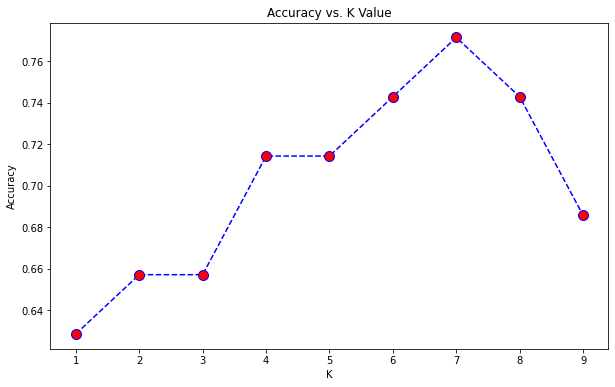

In [359]:
# Building an accuracy plot to find the best K value.

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


accuracy = []
for i in range(1,10):    #checking accuracy rate with different K values, arbitrary range 1-40
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),accuracy,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(accuracy),"at K =",accuracy.index(max(accuracy))+1)

#Decision Tree Classifier

In [360]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
y_pred

print("Accuracy of model at K=7 is",accuracy_score(y_test, y_pred))

Accuracy of model at K=7 is 0.7714285714285715


In [381]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(data,
                                                   classlabel,
                                                   train_size=0.8,
                                                   random_state=123)

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

dt = DecisionTreeClassifier(criterion='entropy', random_state=3, max_depth=3)

dt.fit(X_train, y_train)

y_pred=dt.predict(X_test)
print("Accuracy of model is", accuracy_score(y_pred, y_test))

Accuracy of model is 0.8


#DTC visualization

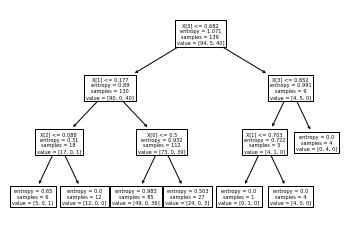

In [362]:
from sklearn import tree
from matplotlib import pyplot as plt

tree.plot_tree(dt)
plt.show()

# Don't Use this code below yet - still WIP

In [363]:
# CORRELATION AND MUTUAL INFORMATION

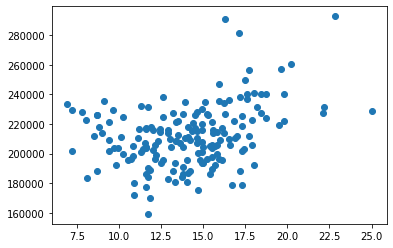

Pearson r is  0.34057060326941885


In [364]:
# Scatter Plot of Min Temp and Max Demand
plt.scatter(df['Minimum temperature (°C)'],df['Max Demand'])
plt.show()
# Appears to be some sort of weak positive correlation

#Pearson's r
print("Pearson r is ",df['Minimum temperature (°C)'].corr(df['Max Demand']))

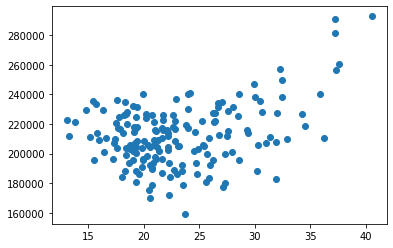

Pearson r is  0.3653451711526997


In [365]:
# Scatter Plot of Max Temp and Max Demand
plt.scatter(df['Maximum temperature (°C)'],df['Max Demand'])
plt.show()
# Appears to be some sort of positive correlation

#Pearson's r
print("Pearson r is ",df['Maximum temperature (°C)'].corr(df['Max Demand']))

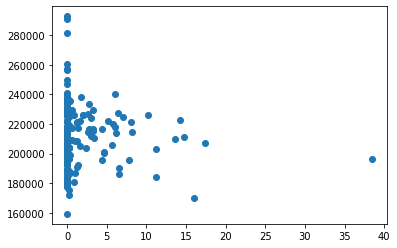

Pearson r is  -0.08558422573436933


In [366]:
# Scatter Plot of Rainfall and Max Demand
plt.scatter(df['Rainfall (mm)'],df['Max Demand'])
plt.show()
# Appears to be no correlation

#Pearson's r
print("Pearson r is ",df['Rainfall (mm)'].corr(df['Max Demand']))

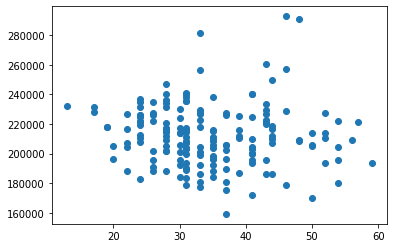

In [367]:
# Scatter Plot of Speed of maximum wind gust (km/h) and Max Demand
plt.scatter(df['Speed of maximum wind gust (km/h)'],df['Max Demand'])
plt.show()
# Appears to be some sort of positive correlation

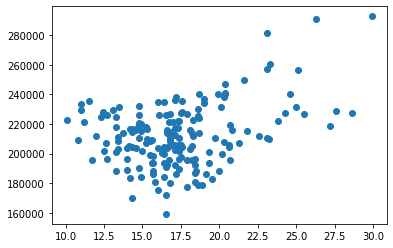

Pearson r is  0.3571891036028727


In [368]:
# Scatter Plot of 9am Temperature (°C) and Max Demand
plt.scatter(df['9am Temperature (°C)'],df['Max Demand'])
plt.show()
# Appears to be none or extremely weak negative correlation

#Pearson's r
print("Pearson r is ",df['9am Temperature (°C)'].corr(df['Max Demand']))

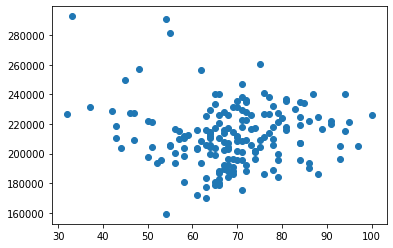

Pearson r is  -0.04852649305796843


In [369]:
# Scatter Plot of 9am relative humidity (%) and Max Demand
plt.scatter(df['9am relative humidity (%)'],df['Max Demand'])
plt.show()
# Appears to be some sort of weak positive correlation / non-linear

#Pearson's r
print("Pearson r is ",df['9am relative humidity (%)'].corr(df['Max Demand']))

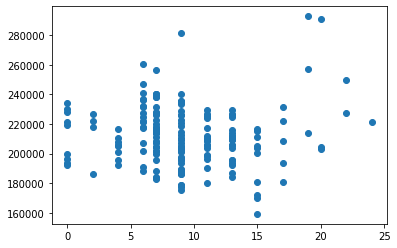

Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am wind direction                    object
9am wind speed (km/h)                float64
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
Max Demand                           float64
Max Price                            float64
Demand_Groups                         object
dtype: object
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Direction of m

In [370]:
# Scatter Plot of 9am wind speed (km/h) and Max Demand
plt.scatter(df['9am wind speed (km/h)'],df['Max Demand'])
plt.show()
# Appears to be no correlation or extemely weak 

print(df.dtypes)
print(df.isnull().sum())

#Pearson's r
# GETTING AN ERROR FOR PEARSON'S - ITS BECAUSE OF VALUES OF 0 in the 9am Wind Speed Col - not correlated so don't bother
print("Pearson r is ",df['9am wind speed (km/h)'].corr(df['Max Demand']))

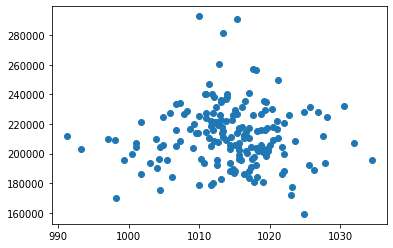

Pearson r is  0.005079802309080045


In [371]:
# Scatter Plot of 9am MSL pressure (hPa) and Max Demand
plt.scatter(df['9am MSL pressure (hPa)'],df['Max Demand'])
plt.show()
# Appears to be no correlation

#Pearson's r
print("Pearson r is ",df['9am MSL pressure (hPa)'].corr(df['Max Demand']))

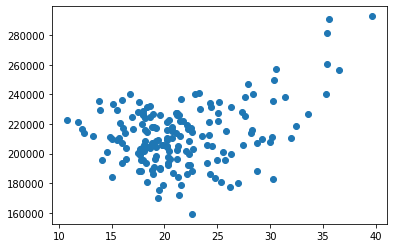

Pearson r is  0.3520917297241678


In [372]:
# Scatter Plot of 3pm Temperature (°C) and Max Demand
plt.scatter(df['3pm Temperature (°C)'],df['Max Demand'])
plt.show()
# Appears to be no correlation

#Pearson's r
print("Pearson r is ",df['3pm Temperature (°C)'].corr(df['Max Demand']))
#Moderate positive correlation

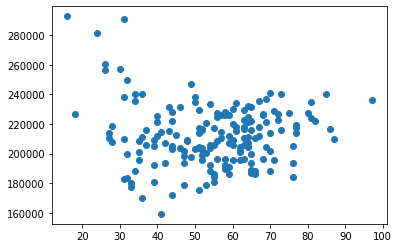

Pearson r is  -0.06498399586349439


In [373]:
# Scatter Plot of 3pm relative humidity (%) and Max Demand
plt.scatter(df['3pm relative humidity (%)'],df['Max Demand'])
plt.show()
# Appears to be some sort of negative correlation (lower humidity means higher demand) but only towards the low range

#Pearson's r
print("Pearson r is ",df['3pm relative humidity (%)'].corr(df['Max Demand']))
#Moderately negatively correlated
#When there is very low wind, there is very high energy demand - could be non-linear?

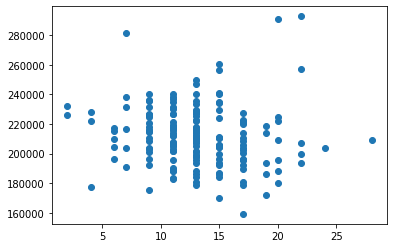

In [374]:
# Scatter Plot of 3pm wind speed (km/h) and Max Demand
plt.scatter(df['3pm wind speed (km/h)'],df['Max Demand'])
plt.show()
# Appears to be some sort of positive correlation


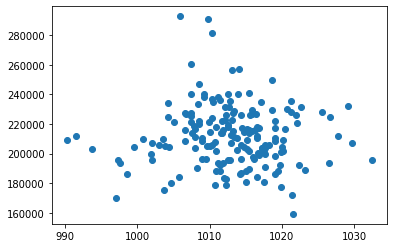

Pearson r is  -0.0258753694796795


In [375]:
# Scatter Plot of 3pm MSL pressure (hPa) and Max Demand
plt.scatter(df['3pm MSL pressure (hPa)'],df['Max Demand'])
plt.show()
# Appears to be no correlation

#Pearson's r
print("Pearson r is ",df['3pm MSL pressure (hPa)'].corr(df['Max Demand']))
#Moderate positive correlation

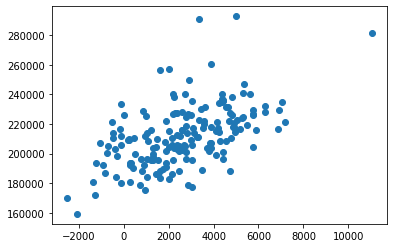

Pearson r is  0.5423175238542455


In [376]:
# Scatter Plot of Price and Max Demand
plt.scatter(df['Max Price'],df['Max Demand'])
plt.show()
# Appears to be no correlation 

#Pearson's r
print("Pearson r is ",df['Max Price'].corr(df['Max Demand']))
#Very weak correlation

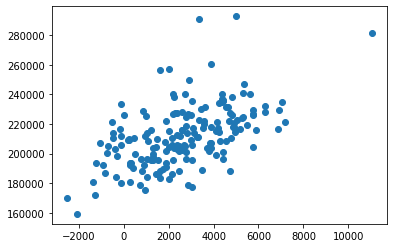

Pearson r is  0.5423175238542455


In [377]:
# Scatter Plot of Max Price and Max Demand
plt.scatter(df['Max Price'],df['Max Demand'])
plt.show()
# Appears to be some sort of positive correlation

#Pearson's r
print("Pearson r is ",df['Max Price'].corr(df['Max Demand']))
#Weak correlation, and the variables are definitely related

In [378]:
# THE FEATURES MOST HIGHLY CORRELATED WITH MAXIMUM DEMAND ARE:

# 3pm Temperature (°C):        0.
# Maximum temperature (°C):    0.
# 9am Temperature (°C):        0.
# 3pm relative humidity (%):  -0.
# Minimum temperature (°C)     0.

In [379]:
# NEED TO DO BINNING